label:0


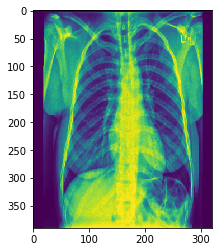

label:0


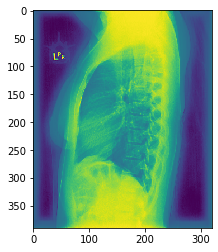

label:0


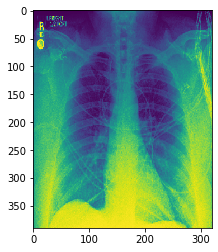

label:1


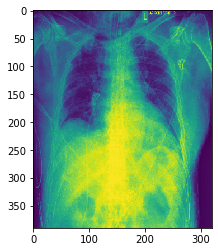

label:0


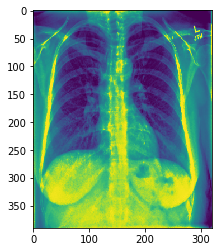

In [3]:
# build train list and valid list

import csv
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

def get_train_list(image_list, label_list):
    root = '/extra1/Dataset/'
    train_csv_path = 'radio.csv'
    with open(train_csv_path) as csv_file:
        csv_reader_lines = csv.reader(csv_file)

        # 创建路径列表和标签列表
        lateral_count = 0
        frontal_count = 0
        for line in csv_reader_lines:
            img = root + line[0]
            if 'lateral' in img:
                lateral_count += 1
            else:
                frontal_count += 1
            image_list.append(img)
            label_list.append(int(line[1]))

        csv_file.close()
        # print(lateral_count, frontal_count)
    return image_list, label_list


def get_test_list(image_list, label_list):
    root = '/extra1/Dataset/'
    test_csv_path = 'valid_test.csv'
    with open(test_csv_path) as csv_file:
        lines = csv.reader(csv_file)

        # 创建路径列表和标签列表
        lateral_count = 0
        frontal_count = 0
        for line in lines:
            img = root + line[0]
            if 'lateral' in img:
                lateral_count += 1
            else:
                frontal_count += 1
            image_list.append(img)
            label_list.append(int(line[1]))

        csv_file.close()
        # print(lateral_count, frontal_count)
    return image_list, label_list


def read_image(filename, label):
    img_string = tf.read_file(filename)
    img_decoded = tf.image.decode_jpeg(img_string)
    imag_resized = tf.image.resize_images(img_decoded, [390, 320])
    return imag_resized, label


def get_valid_list(image_list, label_list):
    valid_csv_path = 'valid_test.csv'
    root = '/extra1/zouli/'

    with open(valid_csv_path) as f:
        lines = csv.reader(f)
        for line in lines:
            img = root + line[0]
            image_list.append(img)
            label_list.append(int(line[1]))

        for i in range(5):
            print(image_list[i], label_list[i])

    return image_list, label_list


# get train list
image_train_list = []
label_train_list = []
image_train_list, label_train_list = get_train_list(image_train_list, label_train_list)
# print(image_train_list[:5], label_train_list[:5])

# get test list
image_test_list = []
label_test_list = []
image_test_list, label_test_list = get_test_list(image_test_list, label_test_list)

# get train dataset
train_dataset = tf.data.Dataset.from_tensor_slices((image_train_list, label_train_list))
train_dataset = train_dataset.map(read_image).batch(5)
# print(train_dataset.output_shapes, train_dataset.output_types)

# get test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((image_test_list, label_test_list))
test_dataset = test_dataset.map(read_image).batch(5)

# 创建迭代器用于传送数据
train_iterator = train_dataset.make_initializable_iterator()
train_next_element = train_iterator.get_next()

test_iterator = test_dataset.make_initializable_iterator()
test_next_element = test_iterator.get_next()

# 输出测试
with tf.Session() as sess:
    sess.run(train_iterator.initializer)
    batch_img, batch_label = sess.run(train_next_element)
    # print(batch_img.shape)
    # print(batch_label.shape)
    for i in range(5):
        print('label:{}'.format(batch_label[i]))
        # np.squeeze()减少不必要的维度，便于plt输出图像
        plt.imshow(np.squeeze(batch_img[i,:,:,:]))
        plt.show()

In [2]:
# build train list and valid list

import csv
import random
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

train_csv_path = '/home/zhouli/model_test/radio.csv'
test_csv_path = '/home/zhouli/model_test/valid_test.csv'
img_w = 128
img_h = 128


def get_label(label):
    # 改变batch_label的维度
    if label == -1:
        return [1, 0, 0]
    if label == 0:
        return [0, 1, 0]
    else:
        return [0, 0, 1]


def get_list(image_list, label_list, csv_path):
    root = '/extra1/Dataset/'
    with open(csv_path) as csv_file:
        csv_reader_lines = csv.reader(csv_file)

        # 创建路径列表和标签列表
        lateral_count = 0
        frontal_count = 0
        for line in csv_reader_lines:
            img = root + line[0]
            if 'lateral' in img:
                lateral_count += 1
            else:
                frontal_count += 1
            image_list.append(img)
            label_list.append(get_label(int(line[1])))

        csv_file.close()
        # print(lateral_count, frontal_count)
    return image_list, label_list


def read_image(filename, label):
    img_string = tf.io.read_file(filename)
    img_decoded = tf.image.decode_jpeg(img_string)
    imag_resized = tf.image.resize(img_decoded, [img_w, img_h])
    return imag_resized, label


def shuffle(image_list, label_list):
    # combine two lists before shuffle
    lists = list(zip(image_list, label_list))
    random.shuffle(lists)
    image_list, label_list = zip(*lists)
    # print(image_list[1], label_list[1])
    
    return image_list, label_list


def init(batch_size):
    class Datasets:
        pass
    # get train list
    image_train_list = []
    label_train_list = []
    Datasets.image_train_list, Datasets.label_train_list = get_list(image_train_list, label_train_list, train_csv_path)
    # Datasets.image_train_list, Datasets.label_train_list = shuffle(Datasets.image_train_list, Datasets.label_train_list)
    # print(image_train_list[:5], label_train_list[:5])

    # get test list
    image_test_list = []
    label_test_list = []
    Datasets.image_test_list, Datasets.label_test_list = get_list(image_test_list, label_test_list, test_csv_path)
    # Datasets.image_test_list, Datasets.label_test_list = shuffle(Datasets.image_test_list, Datasets.label_test_list)
    
    # get train dataset
    train_dataset = tf.data.Dataset.from_tensor_slices((image_train_list, label_train_list))
    train_dataset = train_dataset.shuffle(300)
    Datasets.train_dataset = train_dataset.map(read_image).batch(batch_size)
    # print(train_dataset.output_shapes, train_dataset.output_types)

    # get test dataset
    test_dataset = tf.data.Dataset.from_tensor_slices((image_test_list, label_test_list))
    test_dataset = test_dataset.shuffle(300)
    Datasets.test_dataset = test_dataset.map(read_image).batch(batch_size)

    return Datasets


def test_img(iterator, next_element):
    # 输出测试
    with tf.Session() as sess:
        sess.run(iterator.initializer)
        batch_img, batch_label = sess.run(next_element)
        print(batch_img.shape)
        print(batch_label.shape)
        for i in range(5):
            print('label:{}'.format(batch_label[i]))
            # np.squeeze()减少不必要的维度，便于plt输出图像
            plt.imshow(np.squeeze(batch_img[i, :, :, :]))
            plt.show()

            
def test_shape():
    datasets = init(16)

    # 创建迭代器用于传送数据
    train_iterator = tf.compat.v1.data.make_initializable_iterator(datasets.train_dataset)
    train_next_element = train_iterator.get_next()

    test_iterator = tf.compat.v1.data.make_initializable_iterator(datasets.test_dataset)
    test_next_element = test_iterator.get_next()

    # 输出测试
    with tf.Session() as sess:
        sess.run(train_iterator.initializer)
        sess.run(test_iterator.initializer)
        for i in range(2):
            try:
                batch_img, batch_label = sess.run(train_next_element)
                test_batch_img, test_batch_label = sess.run(test_next_element)

                print(str(i) + '. batch_img.shape = {}'.format(batch_img.shape))
                print(str(i) + '. batch_label.shape = {}'.format(batch_label.shape))
                print(batch_label[:2])
                print(str(i) + '. test_batch_img.shape = {}'.format(test_batch_img.shape))
                print(str(i) + '. test_batch_label.shape = {}'.format(test_batch_label.shape))
                print(test_batch_label[:2])
                print('************************************')
            except tf.errors.OutOfRangeError as e:
                print('Max is ' + str(i-1)) # max:14
                break

                
datasets = init(16)
iter = datasets.test_dataset.make_one_shot_iterator()
el = iter.get_next()
print(el)

(<tf.Tensor 'IteratorGetNext_1:0' shape=(?, 128, 128, ?) dtype=float32>, <tf.Tensor 'IteratorGetNext_1:1' shape=(?, 3) dtype=int32>)
